<a href="https://colab.research.google.com/github/FerLopezCarrillo/challenge_amigo_secreto/blob/main/Curso_de_Estad%C3%ADstica_con_Python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=#56B4E9 size=10>CURSO DE ESTADÍSTICA</font>
***

<font color=#56B4E9 size = 5>*Preparando el ambiente*</font>

# <font color=#56B4E9>1 CONOCIENDO LOS DATOS</font>
***

## <font color=#56B4E9>1.1 Dataset del proyecto</font>
***

### Muestra de domicilios Colombia - 2018

Las investigaciones por muestras de domicilios realizadas anualmente, buscan encontrar característcias generales de la población, de educación, trabajo, rendimiento y otras, de acuerdo con las necesidades de información del país, tales como las características de migración, fertilidad, casamientos, salud, nutrición, entre otros temas. Estas muestras al pasar de los años consistuyen una herramienta importante para la formulación, validación y evaluación de políticas dirigidas al desarrollo socioeconómico y la mejora de las condiciones de vida en Colombia.


### Datos

Los datos fueron creados  de manera didáctica para este curso.

### Variables utilizadas

> ### Ingreso
> ***

Ingresos mensuales (en miles de pesos) del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del entrevistado en la fecha de referencia en años.

> ### Altura
> ***

Altura del entrevistado em metros.

> ### Ciudad
> ***

Código de referência a 27 ciudades analizadas.


> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin estudios y menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No se sabe|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indio|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Moreno|
|9|Sin declarar|

> ### Tratamiento a los datos
***

> Algunos de los tratamientos de datos más frecuentes son:
> 1. Eliminar las observaciones (líneas) con entradas de datos inválidos;
> 2. Eliminar observaciones donde hay datos perdidos (missing data);
> 3. Filtros própios de la investigación, por ejemplo: considerar solo las encuestas realizadas a la cabeza de familia (responsable por el domicilio).

### Importando pandas y leyendo el dataset del projecto

https://pandas.pydata.org/

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv("/content/datos.csv")

In [3]:
datos.sample(10)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
15040,23,0,29,8,12,120,1.591297
74836,53,0,48,6,16,10000,1.836963
45691,33,1,65,2,7,210,1.763773
63689,43,1,42,2,12,800,1.715212
69050,50,0,39,8,4,1000,1.602946
10332,17,1,52,2,16,1200,1.630586
61914,43,0,46,2,3,1000,1.783845
11249,17,0,47,8,12,1580,1.723616
64332,43,0,45,2,1,50,1.508485
50419,35,1,23,2,12,905,1.715596


## <font color=#56B4E9>1.2 Tipos de datos</font>
***

### Clasificación de una variable
<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img001.png' width='70%'>

### Variables cualitativas ordinales

► Variables que pueden ser ordenadas o que responen algun tipo de jerarquía

In [4]:
print([int(x) for x in sorted(datos['Años de Estudio'].unique())])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


### Variables cualitativas nominales

► Variables que no pueden ser ordenadas ni responden alguna jerarquía.

In [5]:
print([int(x) for x in sorted(datos['Sexo'].unique())])

[0, 1]


In [6]:
print([int(x) for x in sorted(datos['Color'].unique())])

[0, 2, 4, 6, 8]


In [7]:
print([int(x) for x in sorted(datos['Ciudad'].unique())])

[11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 41, 42, 43, 50, 51, 52, 53]


### Variables cuantitativas discretas

► Variables que representan un conteo donde los valores posibles forman un conjunto finito o numerable.


In [8]:
datos['Edad'].max();
datos.Edad.max()

99

In [9]:
print(f"La edad mínima es {datos.Edad.min()} y la edad máxima es {datos.Edad.max()}")

La edad mínima es 13 y la edad máxima es 99


#### <font color='red'>Observación</font>
***
> La variable edad puede ser clasificada de tres formas diferentes:
> 1. <b>CUANTITATIVA DISCRETA</b> - cuando representa años completos (números enteros);
> 2. <b>CUANTITATIVA CONTINUA</b> - cuando representa la edad exacta, siendo representada por fracciones de años;
> 3. <b>CUALITATIVA ORDINAL</b> - cuando representa  intervalos de edad.

### Variables cuantitativas continuas

► Variables que representan un conteo o medición que asume valores en escalas continuas (números reales).

In [10]:
print(f"La Altura mínima es {datos.round(2)['Altura'].min()} m y la altura máxima es {datos.round(2)['Altura'].max()} m")

La Altura mínima es 1.34 m y la altura máxima es 2.03 m


# <font color=#56B4E9>2 DISTRIBUCIÓN DE FRECUENCIAS</font>
***

El primer paso en un análisis es conocer el comportamiento de las variables involucradas en el estudio. Utilizando técnicas estadísticas como el análisis de las <b> DISTRIBUCIONES DE FRECUENCIAS </b> e <b> HISTOGRAMAS </b> podemos evaluar mejor cómo se distribuyen los fenómenos del estudio.



## <font color=#56B4E9>2.1 Distribución de frecuencias para variables cualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [11]:
datos.Sexo.value_counts()

,count
Sexo,
0,53250
1,23590


In [12]:
datos.Sexo.value_counts(normalize=True).round(4)*100

,proportion
Sexo,
0,69.3
1,30.7


In [13]:
frecuencia_sexo = datos.Sexo.value_counts()
frecuencia_sexo

,count
Sexo,
0,53250
1,23590


In [14]:
porcentaje_sexo = datos.Sexo.value_counts(normalize=True).round(4)*100
porcentaje_sexo

,proportion
Sexo,
0,69.3
1,30.7


In [15]:
dist_frec_cualitativa = pd.DataFrame({'Frecuencia': frecuencia_sexo,'Porcentaje %': porcentaje_sexo})
dist_frec_cualitativa

,Frecuencia,Porcentaje %
Sexo,,
0,53250,69.3
1,23590,30.7


In [92]:
dist_frec_cualitativa.rename(index= {0: 'Masculino', 1: 'Femenino'}, inplace= True)


In [17]:
dist_frec_cualitativa.rename_axis('Sexo', axis= 'columns', inplace= True)

In [18]:
dist_frec_cualitativa

Sexo,Frecuencia,Porcentaje %
Sexo,,
Masculino,53250,69.3
Femenino,23590,30.7


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [19]:
sexo = {0: 'Masculino',
        1: 'Femenino'}

color = {0: 'Indigena',
         2: 'Blanco',
         4: 'Negro',
         6: 'Amarillo',
         8: 'Pardo',
         9: 'Sin declarar'}

In [20]:
frecuencia = pd.crosstab(datos.Sexo,datos.Color)

In [21]:
frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [22]:
frecuencia.rename(index= sexo, inplace= True)
frecuencia.rename(columns = color, inplace= True)

In [23]:
frecuencia

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


## <font color=#56B4E9>2.2 Distribución de frecuencia para variables cuantitativas (clases personalizadas)</font>
***

### Paso 1 - Especifique los límites de cada clase

Utilice la siguiente clasificación:

<b>A</b> ► Más de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Hasta 2 SM

donde <b>SM</b> es el valor del salario mínimo en ese momento. En nuestro caso <b>788 mil pesos colombianos</b> (2018):

<b>A</b> ► Más de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Hasta 1.576


In [24]:
datos.Ingreso.min()

0

In [25]:
datos.Ingreso.max()

200000

In [26]:
clases = [0, 1576, 3152, 7880, 15760, 200000]

In [27]:
label = ['E', 'D', 'C', 'B', 'A']

### Paso 2 - Crear la tabla de frecuencias

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [28]:
frecuencia = pd.value_counts(
                    pd.cut(x = datos.Ingreso,
                    bins = clases,
                    labels = label,
                    include_lowest = True))
frecuencia

/tmp/ipython-input-1161343293.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia = pd.value_counts(


,count
Ingreso,
E,49755
D,16700
C,7599
B,2178
A,608


In [29]:
porcentaje = pd.value_counts(
                    pd.cut(x = datos.Ingreso,
                    bins = clases,
                    labels = label,
                    include_lowest = True),
                    normalize=True).round(4)*100
porcentaje

/tmp/ipython-input-427569784.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentaje = pd.value_counts(


,proportion
Ingreso,
E,64.75
D,21.73
C,9.89
B,2.83
A,0.79


In [30]:
dist_frec_cuant_personalizada = pd.DataFrame({'Frecuencia': frecuencia,'Porcentaje %': porcentaje})

In [31]:
dist_frec_cuant_personalizada.sort_index(ascending=False)

,Frecuencia,Porcentaje %
Ingreso,,
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


## <font color=#56B4E9>2.3 Distribución de frecuencia para variables cuantitativas (clases de amplitud fija)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [32]:
import numpy as np

### Paso 1 - Difiniendo el número de clases

#### Regla de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [33]:
n = datos.shape[0]
n

76840

In [34]:
k = 1 + (10/3) * np.log10(n)

In [35]:
print(k.round(4))

17.2853


### Paso 2 - Crear la tabla de frecuencias

In [36]:
frecuencia_sturges = pd.value_counts(
                    pd.cut(x = datos.Ingreso,
                    bins = 17,
                    include_lowest = True))
frecuencia_sturges

/tmp/ipython-input-3493287368.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia_sturges = pd.value_counts(


,count
Ingreso,
"(-200.001, 11764.706]",75594
"(11764.706, 23529.412]",1022
"(23529.412, 35294.118]",169
"(35294.118, 47058.824]",19
"(47058.824, 58823.529]",16
"(94117.647, 105882.353]",6
"(58823.529, 70588.235]",5
"(70588.235, 82352.941]",4
"(188235.294, 200000.0]",3


### Ejercicio 2 - Crear la tabla de porcentajes

In [37]:
porcentaje_sturges = pd.value_counts(
                    pd.cut(x = datos.Ingreso,
                    bins = 17,
                    include_lowest = True),
                    sort = False,
                    normalize = True)*100
porcentaje_sturges

/tmp/ipython-input-664899496.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentaje_sturges = pd.value_counts(


,proportion
Ingreso,
"(-200.001, 11764.706]",98.378449
"(11764.706, 23529.412]",1.330036
"(23529.412, 35294.118]",0.219938
"(35294.118, 47058.824]",0.024727
"(47058.824, 58823.529]",0.020822
"(58823.529, 70588.235]",0.006507
"(70588.235, 82352.941]",0.005206
"(82352.941, 94117.647]",0.001301
"(94117.647, 105882.353]",0.007808


In [38]:
dist_frec_cuant_amplitud_fija = pd.DataFrame({'Frecuencia': frecuencia_sturges,'Porcentaje %': porcentaje_sturges})
dist_frec_cuant_amplitud_fija

,Frecuencia,Porcentaje %
Ingreso,,
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808


## <font color=#56B4E9>2.4 Histograma</font>
***

El <b>HISTOGRAMA</b> es la representación gráfica de una distribución de frecuencia. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

### Importando la biblioteca

https://seaborn.pydata.org/

In [39]:
import seaborn as sns

/tmp/ipython-input-3889597576.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura,  kde = False)


<Axes: title={'center': 'Distribución de frecuencia - Altura'}, xlabel='Altura (metros)'>

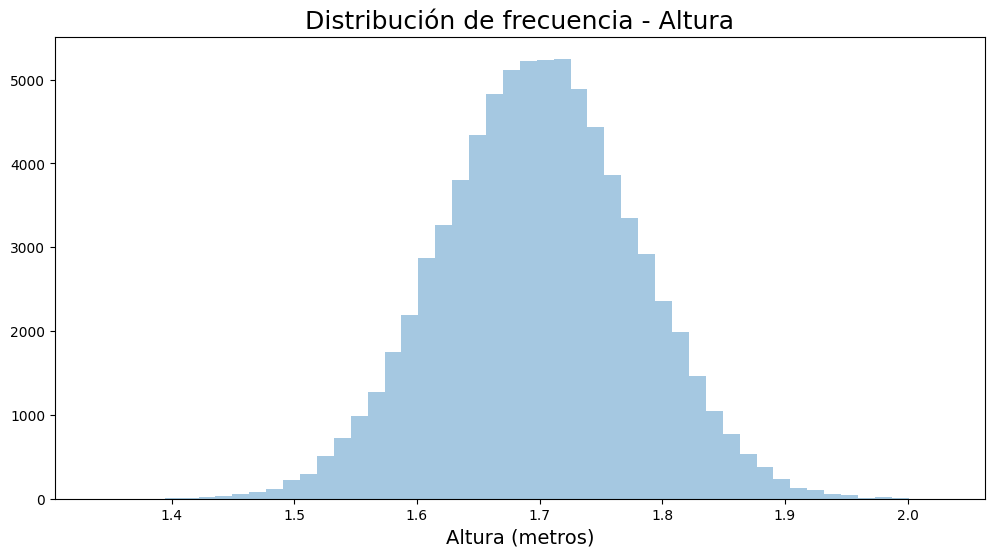

In [40]:
ax = sns.distplot(datos.Altura,  kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia - Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax

/tmp/ipython-input-683600033.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura,  kde = True)


<Axes: title={'center': 'Distribución de frecuencia - Altura - KDE'}, xlabel='Altura (metros)', ylabel='Density'>

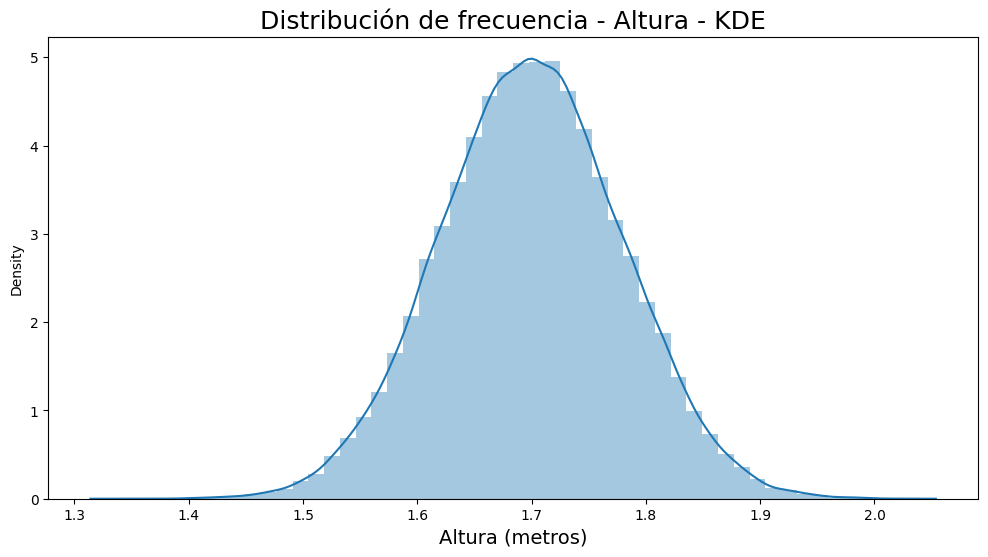

In [41]:
ax = sns.distplot(datos.Altura,  kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia - Altura - KDE', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax

**Tarea: Hacer ejercicio con la variable Ingreso y Edad**

# <font color=#56B4E9>3 MEDIDAS DE TENDENCIA CENTRAL</font>
***

## DataFrame de ejemplo

In [42]:
df = pd.DataFrame(data = {'María': [8, 10, 4, 8, 6, 10, 8],
                          'Pedro': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Pablo': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática',
                           'Portugués',
                           'Inglés',
                           'Geografía',
                           'Historia',
                           'Física',
                           'Química'])
df.rename_axis('Asignaturas', axis = 'columns', inplace = True)
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=#56B4E9>3.1 Media aritmética</font>
***

Es representada por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)

In [43]:
(8+10+4+8+6+10+8)/7

7.714285714285714

In [44]:
print(df['María'].mean())

7.714285714285714


In [45]:
med_arit = datos.groupby(['Sexo'])['Ingreso'].mean()
med_arit

,Ingreso
Sexo,
0,2192.441596
1,1566.847393


## <font color=#56B4E9>3.2 Mediana</font>
***

Para obtener la mediana de un conjunto de datos, debemos proceder de la siguiente manera:
1. Ordenar el conjunto de datos;
2. Identificar el número de observaciones (registros) del conjunto de datos ($n$);
3. Identicar el elemento del medio:

> Cuando $n$ sea impar, la posición del elemento del medio se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n+1}{2}$$

> Cuando $n$ sea par, la posición del elemento mediano se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n}2$$

4. Obtener la mediana:

> Cuando $n$ sea impar:


# $$Md = X_{Elemento_{Md}}$$

> Cuando $n$ sea par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Ejemplo 1 - n impar

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img002.png' width='40%' style="float:left">

In [46]:
calificaciones_maria = df['María']
calificaciones_maria

,María
Matemática,8
Portugués,10
Inglés,4
Geografía,8
Historia,6
Física,10
Química,8


In [47]:
calificaciones_maria = calificaciones_maria.sort_values()
calificaciones_maria

,María
Inglés,4
Historia,6
Geografía,8
Matemática,8
Química,8
Portugués,10
Física,10


In [48]:
n = calificaciones_maria.shape[0]
n

7

In [49]:
calificaciones_maria = calificaciones_maria.reset_index()

In [50]:
calificaciones_maria

,index,María
0,Inglés,4
1,Historia,6
2,Geografía,8
3,Matemática,8
4,Química,8
5,Portugués,10
6,Física,10


In [51]:
elemento_md = (n+1)/2
elemento_md

4.0

In [52]:
calificaciones_maria.loc[elemento_md - 1]

,3
index,Matemática
María,8


In [53]:
calificaciones_maria['María'].median()

8.0

### Ejemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img003.png' width='50%' style="float:left">

In [54]:
calificaciones_pedro = df['Pedro'].sample(6, random_state = 200)
calificaciones_pedro

,Pedro
Geografía,1.0
Física,9.5
Química,10.0
Historia,3.0
Matemática,10.0
Portugués,2.0


In [55]:
calificaciones_pedro = calificaciones_pedro.sort_values()
calificaciones_pedro

,Pedro
Geografía,1.0
Portugués,2.0
Historia,3.0
Física,9.5
Química,10.0
Matemática,10.0


In [56]:
n = calificaciones_pedro.shape[0]
n

6

In [57]:
calificaciones_pedro = calificaciones_pedro.reset_index()
calificaciones_pedro

,index,Pedro
0,Geografía,1.0
1,Portugués,2.0
2,Historia,3.0
3,Física,9.5
4,Química,10.0
5,Matemática,10.0


In [58]:
elemento_md = n / 2 ###Otra variante, para forzar que salga entero: elemento_md = int (n / 2)######
elemento_md

3.0

In [59]:
print((calificaciones_pedro.loc[elemento_md - 1][1] + calificaciones_pedro.loc[elemento_md][1]) / 2)

6.25


/tmp/ipython-input-1937221488.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print((calificaciones_pedro.loc[elemento_md - 1][1] + calificaciones_pedro.loc[elemento_md][1]) / 2)


In [60]:
calificaciones_pedro['Pedro'].median()

6.25

### Obtener la mediana en nuestro conjunto de datos

In [61]:
datos.Ingreso.median()

1200.0

## <font color=#56B4E9>3.3 Moda</font>
***

La moda se puede definir como el valor más frecuente de un conjunto de datos. La moda es ampliamente utilizada para datos cualitativos.

In [62]:
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [63]:
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [64]:
ejemplo = pd.Series([1,2,2,3,4,4,5,6,7])
ejemplo

,0
0,1
1,2
2,2
3,3
4,4
5,4
6,5
7,6
8,7


In [65]:
ejemplo.mode()

,0
0,2
1,4


### Obteniendo la moda de nuestro dataset

In [66]:
datos.Ingreso.mode()

,Ingreso
0,788


In [67]:
datos.Altura.mode()###moda multimodal####

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


## <font color=#56B4E9>3.4 Relación entre media, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img004.png' width='80%'>

### Evaluando la variable INGRESO

/tmp/ipython-input-280947843.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.query("Ingreso < 20000").Ingreso,  kde = True) ##Funcion quey es para hacer zoom##


<Axes: title={'center': 'Distribución de frecuencia - Ingreso'}, xlabel='Ingreso (pesos colombianos)', ylabel='Density'>

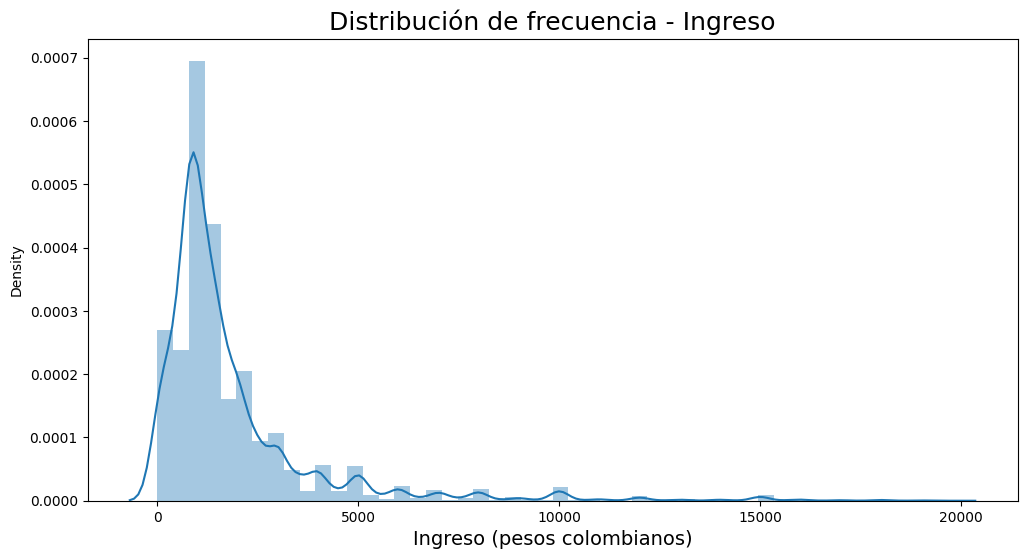

In [68]:
ax = sns.distplot(datos.query("Ingreso < 20000").Ingreso,  kde = True) ##Funcion quey es para hacer zoom##

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia - Ingreso', fontsize=18)
ax.set_xlabel('Ingreso (pesos colombianos)', fontsize=14)
ax

In [69]:
Moda = datos.Ingreso.mode()[0]
print(Moda)

788


In [70]:
Mediana = datos.Ingreso.median()
Mediana

1200.0

In [71]:
Media = datos.Ingreso.mean()
print(Media)

2000.3831988547631


In [72]:
print(Moda < Mediana < Media) ###Como es verdadero,la relación entre la media, mediana y la moda es del tipo "asimétrica a la derecha"####

True


***

### Evaluando la variable ALTURA

/tmp/ipython-input-1105571329.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura,  kde = True)


<Axes: title={'center': 'Distribución de frecuencia - Altura'}, xlabel='Altura (metros)', ylabel='Density'>

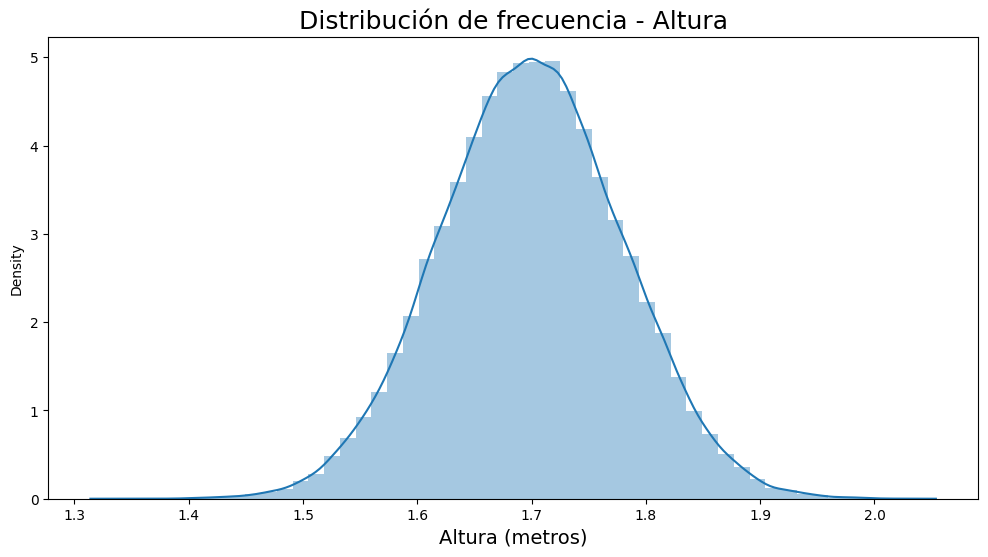

In [73]:
ax = sns.distplot(datos.Altura,  kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia - Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax

In [74]:
Moda = datos.Altura.mode()
Moda

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


In [75]:
Mediana = datos.Altura.median()
Mediana

1.6993247325

In [76]:
###Como los valores de moda, media y mediana están concentrados, la relación es del tipo "simétrica"####

***

### Evaluando la variable AÑOS DE ESTUDIO

/tmp/ipython-input-2972598825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos['Años de Estudio'],  kde = True, bins = 17)###Para acercar mas la grafica (hacer zoom) nos sirve la función "bins####"


<Axes: title={'center': 'Distribución de frecuencia - Años de Estudio'}, xlabel='Años de estudios', ylabel='Density'>

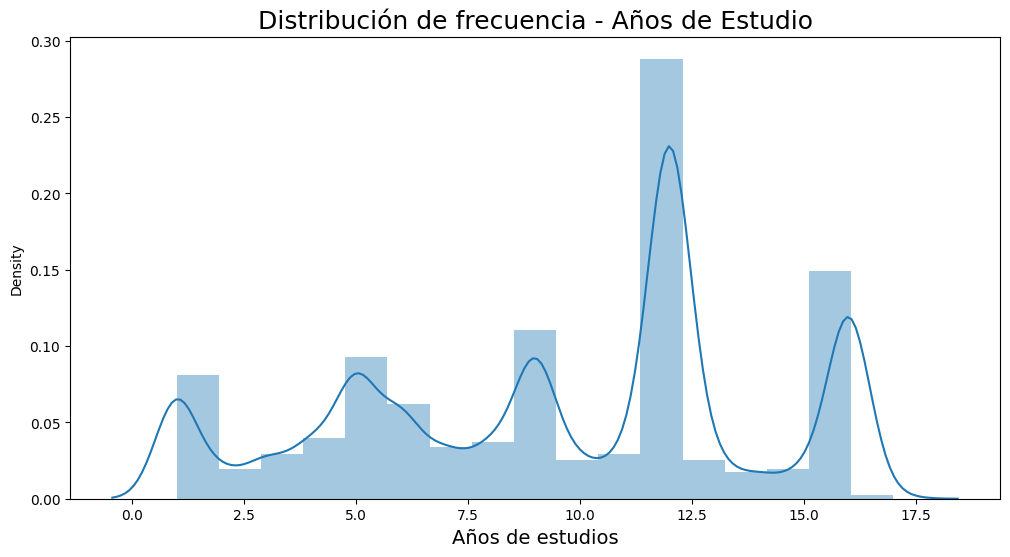

In [77]:
ax = sns.distplot(datos['Años de Estudio'],  kde = True, bins = 17)###Para acercar mas la grafica (hacer zoom) nos sirve la función "bins####"

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia - Años de Estudio', fontsize=18)
ax.set_xlabel('Años de estudios', fontsize=14)
ax

In [78]:
Moda = datos['Años de Estudio'].mode()[0]
print(Moda)

12


In [79]:
Mediana = datos['Años de Estudio'].median()
Mediana

11.0

In [80]:
Media = datos['Años de Estudio'].mean()
print(Media)

9.469664237376367


In [81]:
print(Moda < Mediana < Media) ###Como es falso,la relación es del tipo "asimétrica a la izquierda"####

False


# <font color=#56B4E9>4 MEDIDAS DE LOCALIZACIÓN</font>
***

Herramientas estadisticas que nos permiten identificar como esta nuestro conjunto de datos y nos proporciona un analisis con valores relativos, diferentes a las medidas de tendencia central, donde podemos ver el comportamiento y la tendencia del conjunto de datos.

## <font color=#56B4E9>4.1 Cuartiles, deciles y percentiles</font>
***

Hay una serie de medidas de posición similares en su diseño a la mediana, aunque no son medidas de tendencia central. Como se sabe, la mediana divide la distribución en dos partes iguales en términos del número de elementos en cada parte. Los cuartiles, por otro lado, permiten que la distribución se divida en cuatro partes iguales en términos del número de elementos en cada uno; deciles en diez partes y centiles en cien partes iguales. Esto para entender como está distribuida nuestra base de datos.

In [82]:
datos.Ingreso.quantile([0.25,0.5,0.75])  ####Cuartiles#####

,Ingreso
0.25,788.0
0.50,1200.0
0.75,2000.0


Para obtener el porcentaje de cada parte, de manera que queden iguales ya sean quartiles, deciles o centiles:

In [83]:
[i/10 for i in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [84]:
datos.Ingreso.quantile([i/10 for i in range (1,10)])  ####Deciles#####

,Ingreso
0.1,350.0
0.2,788.0
0.3,800.0
0.4,1000.0
0.5,1200.0
0.6,1500.0
0.7,1900.0
0.8,2500.0
0.9,4000.0


In [85]:
datos.Ingreso.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])  ####Deciles (PRIMITIVAMENTE)#####

,Ingreso
0.1,350.0
0.2,788.0
0.3,800.0
0.4,1000.0
0.5,1200.0
0.6,1500.0
0.7,1900.0
0.8,2500.0
0.9,4000.0


In [86]:
[i/100 for i in range(1,100)]

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99]

In [87]:
datos.Ingreso.quantile([i/100 for i in range (1,100)])  ####Centiles#####

,Ingreso
0.01,0.0
0.02,0.0
0.03,0.0
0.04,50.0
0.05,100.0
...,...
0.95,6000.0
0.96,7000.0
0.97,8000.0
0.98,10000.0


/tmp/ipython-input-2571058444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Edad,


<Axes: title={'center': 'Distribución de Frecuencia Acumulada - Deciles'}, xlabel='Años', ylabel='Acumulado'>

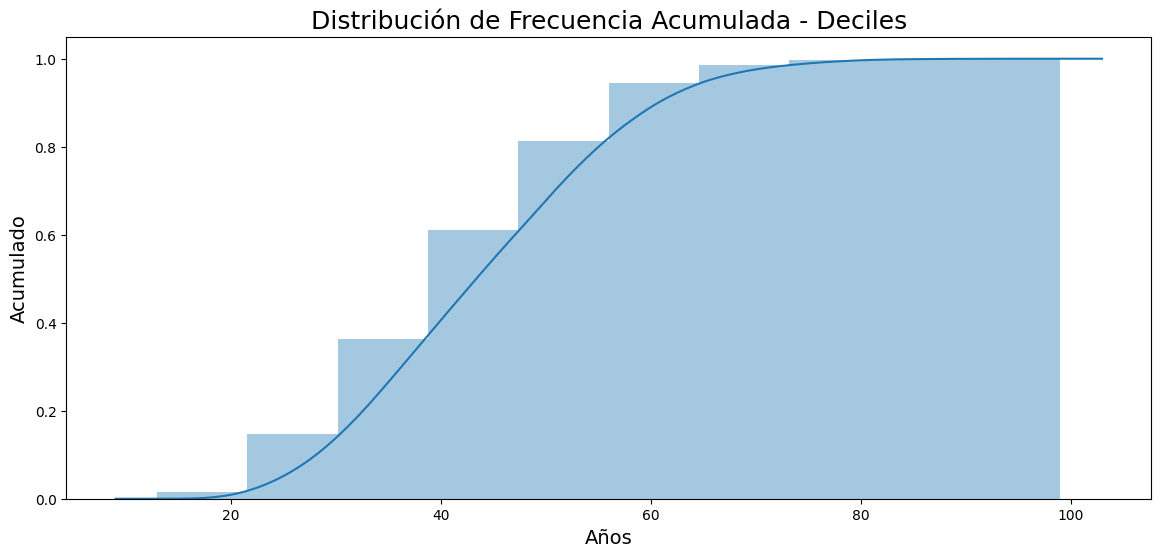

In [88]:
ax = sns.distplot(datos.Edad,
                 hist_kws = {'cumulative': True},
                 kde_kws = {'cumulative': True},
                 bins = 10)

ax.figure.set_size_inches(14,6)
ax.set_title('Distribución de Frecuencia Acumulada - Deciles', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Años', fontsize=14)
ax

In [89]:
datos.Edad.quantile([i/10 for i in range (1,10)])##Deciles##

,Edad
0.1,28.0
0.2,33.0
0.3,36.0
0.4,40.0
0.5,43.0
0.6,47.0
0.7,51.0
0.8,55.0
0.9,61.0


## <font color=#56B4E9>4.2 Box-plot</font>
***

El *box plot* o diagrama de caja, da una idea de la posición, dispersión, asimetría, colas y valores extremos. La posición central está dada por la mediana y la dispersión por $IIQ$ (distancia inter cuartil). Las posiciones relativas de $Q1$, $Mediana$ y $Q3$ dan una idea de la simetría de la distribución. Las longitudes de las colas están dadas por las líneas que van desde el rectángulo a los valores remotos y por los valores extremos.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img005.png' width='65%'>

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

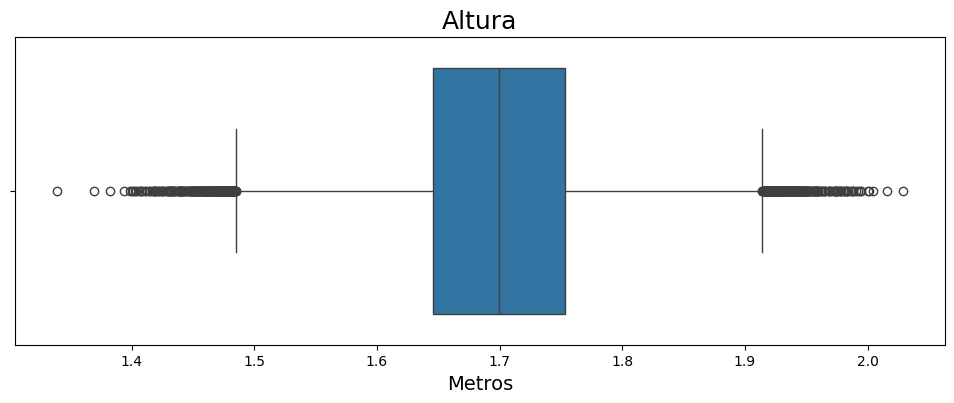

In [90]:
ax = sns.boxplot(x = 'Altura', data=datos, orient = 'h')

ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

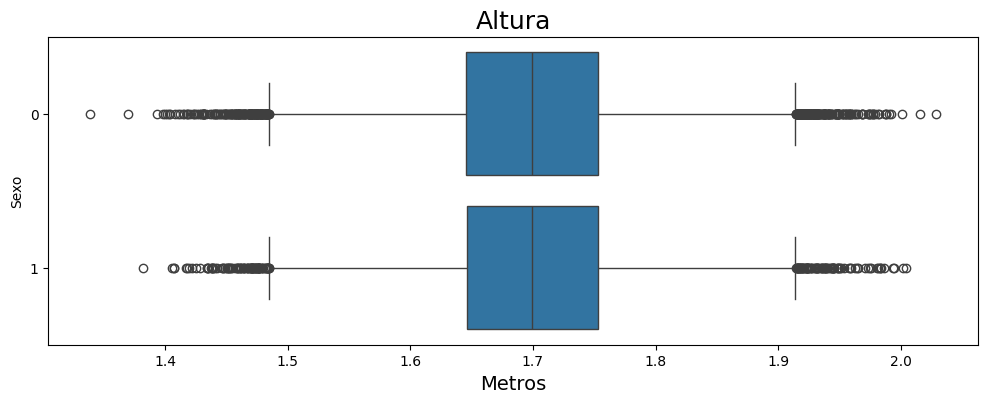

In [94]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo',data=datos, orient= 'h')

ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Ingreso'}, xlabel='Metros'>

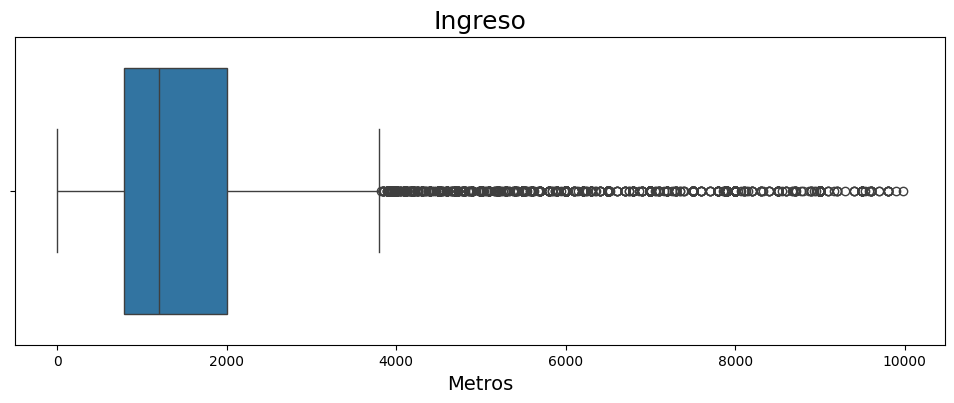

In [101]:
ax = sns.boxplot(x = 'Ingreso',data=datos.query("Ingreso < 10000"), orient= 'h')###La variable '.query' nos sirve para hacer un zoom en una variable especifica contenida en un conjunto de datos, en un rango específico###

ax.figure.set_size_inches(12,4)
ax.set_title('Ingreso', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

Como podemos apreciar, no son un conjunto de variables simétricas, más bien, se trata de un conjunto "asimétrico a la derecha". En este caso no hay outliers negativos, ya que el salario minimo debe ser mayor que cero. En este caso particular, abría que ver si los outliers positivos debe realizarse otro analisis para verificar que no tengan un impacto en el analisis e interpretación.

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

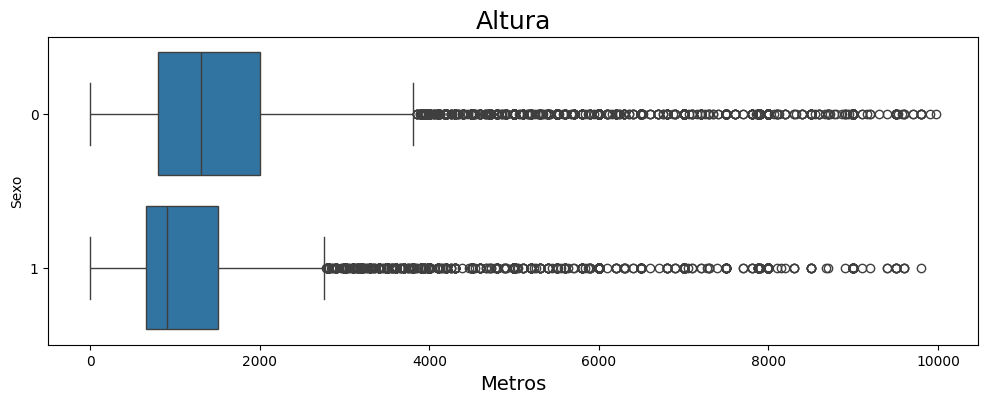

In [102]:
ax = sns.boxplot(x = 'Ingreso', y = 'Sexo', data=datos.query("Ingreso < 10000"), orient= 'h')###La variable '.query' nos sirve para hacer un zoom en una variable especifica contenida en un conjunto de datos, en un rango específico###

ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

Por lo que observamos en este conjunto de datos, el sexo "Masculino" percibe mayor salario que el grupo "Femenino", es decir, la porporcion de datos de las mujeres que se encuentran en el 25-75%, están más cerca del cero que en los hombres; además, tiene mayor simetría en cuanto a la variable "Altura", que el sexo "Femenino"

<Axes: title={'center': 'Años de Estudio'}, xlabel='Años'>

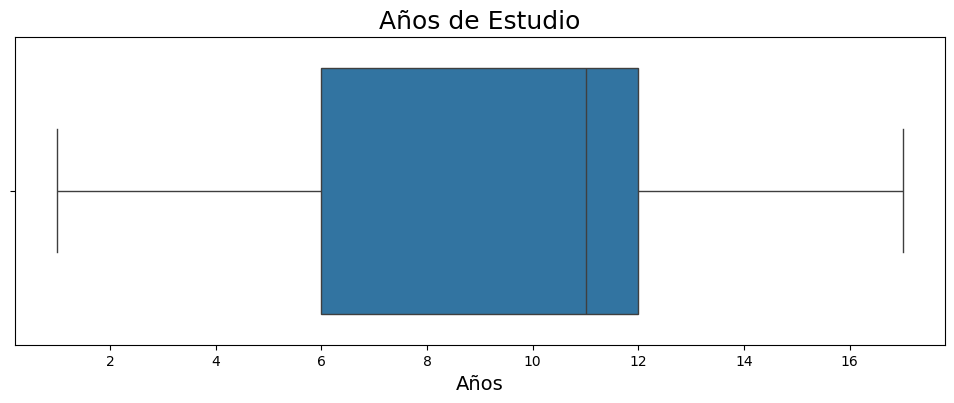

In [107]:
ax = sns.boxplot(x = 'Años de Estudio', data=datos, orient= 'h')

ax.figure.set_size_inches(12,4)
ax.set_title('Años de Estudio', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax

<Axes: title={'center': 'Años de Estudio'}, xlabel='Años', ylabel='Sexo'>

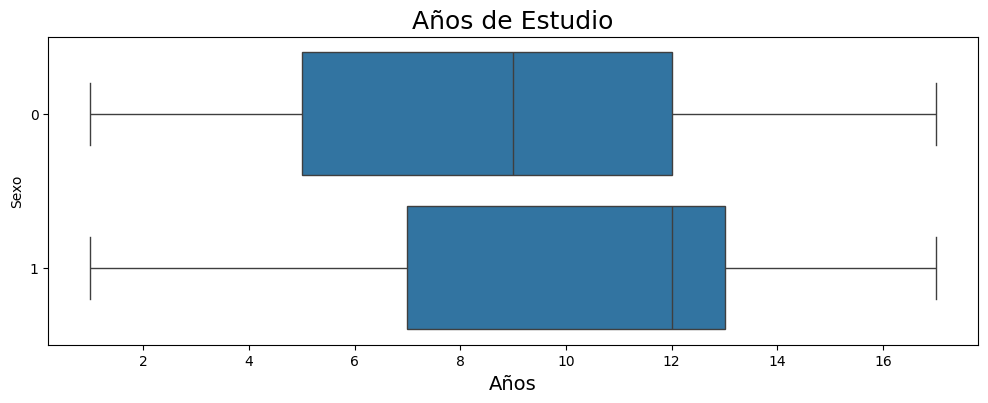

In [106]:
ax = sns.boxplot(x = 'Años de Estudio', y = 'Sexo', data=datos, orient= 'h')

ax.figure.set_size_inches(12,4)
ax.set_title('Años de Estudio', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax

Pdemos observar, que la mediana del sexo femenino esta concentrada en 12 años, para el seño masculino, se concentra en 9 años.
Si comparamos la información de los graficos de "Ingreso por sexo" y "Años de estudio por sexo" se aprecia que, independientemente de los años que estudie la mujer, tendrá un salario menor que el de los hombres.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img006.png' width='80%'>

# <font color=#56B4E9>5 MEDIDAS DE DISPERSIÓN</font>
***

Aunque las medidas de tendencia central y de localización proporcionan un resumen muy importante de los datos, pueden no ser suficientes para caracterizar diferentes conjuntos, especialmente cuando las observaciones de una distribución dada presentan datos muy dispersos.

## <font color=#56B4E9>5.1 Desviación media absoluta</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## <font color=#56B4E9>5.2 Varianza</font>
***

### Varianza

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media son elevadas al cuadrado.

### Varianza de la población

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Varianza de la muestra

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

## <font color=#56B4E9>5.3 Desviación estándar</font>
***

Una de las restricciones de la varianza es el hecho de que proporciona medidas cuadráticas de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por lo tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

### Desviación estándar de la población

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$


### Desviación estándar de la muestra

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$